Nama : Randi Julian Saputra

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/github/randiijulian/Machine-Learning-Terapan-Dicoding/blob/main/Recommender%20System/Recommender_System.ipynb)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?logo=linkedin)](https://www.linkedin.com/in/randijulian/)
[![Github](https://img.shields.io/badge/Open%20In-GitHub-lightgrey?logo=github)](https://github.com/randiijulian)
[![Dataset](https://img.shields.io/badge/Open%20In-Kaggle-blue?logo=kaggle)](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

## Project Submission 2 Dicoding Machine Learning Terapan
**Recommender System**

---

Pada project Machine Learning saya membuat Recommender System mengenai pencarian buku berdasarkan preferensi pengguna dan rating yang diberikan pengguna sebelumnya. Perpustakaan sudah merambah ke ranah digital. Keberadaan sistem informasi perpustakaan di perguruan tinggi dapat  dirasakan telah  memudahkan para  pengunjung, baik mahasiswa maupun dosen, dalam  mencari bahan referensi yang  menjadi  koleksi perpustakaan  dimaksud.

Proyek ini berguna ketika pengunjung perpustakaan kampus menelusuri judul buku dan judul buku terkait tidak tersedia dan tidak adanya rekomendasi untuk buku-buku lain   yang mungkin menarik untuk dibaca atau bahkan dibutuhkan  sebagai pelengkap dari judul buku yang diinginkan, maka peran sistem rekomendasi disini sangat dibutuhkan. Rekomendasi tersebut bisa berdasarkan preferensi pengunjung dan rating yang diberikan pengunjung sebelumnya.

[Referensi terkait](http://jurnal.iaii.or.id/index.php/RESTI/article/view/971/158)

**Connect to drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System"

/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System


**Import needed library and module**

In [5]:
!pip install tensorflow

**Load Dataset**
Install kaggle and using kaggle API for import public dataset from kaggle

In [5]:
!pip install -U -q kaggle # install kaggle for using kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # use API kaggle for import file from kaggle
# download file from kaggle and place to folder dataset
!kaggle datasets download -d arashnic/book-recommendation-dataset -p "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset"
!ls

book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset  Model	Notebooks


unzip file and place to folder dataset

In [6]:
!unzip "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/book-recommendation-dataset.zip" -d "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/"

## Data Understanding

---



### Atribut Tiap Dataset

#### Book Atribute

In [6]:
import pandas as pd
book = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Books.csv")
book

<ipython-input-6-8d1419cada06>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Deskripsi variabel pada dataset book

In [7]:
book.info()
book.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


#### Rating Atribute

In [8]:
import pandas as pd
rating = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Ratings.csv")
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Deskripsi variabel pada dataset rating

In [9]:
rating.info()
rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


#### User Atribute

In [10]:
import pandas as pd
user = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Users.csv")
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Deskripsi variabel pada dataset user

In [11]:
user.info()
user.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Mengambil sampel dataset yang akan digunakan untuk training dan evaluasi dengan rasio 25% pada tiap dataset yang digunakan

In [12]:
book = book.sample(frac=0.25)
user = user.sample(frac=0.25)
rating = rating.sample(frac=0.25)

Melakukan penghapusan Image Url pada dataset book

In [13]:
book = book.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=0)
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
114606,3525713878,IANUA NOVA. Ausgabe A und B. Begleitgrammatik ...,Rudolf SeebaÃ?Â?,1978,"Vandenh. u. R., GÃ?Â¶tt."
119604,0806975695,Spine-Tingling Magic Tricks,David Knoles,2001,Sterling
33321,2702478476,Le labyrinthe de pharaon,Serge Brussolo,1998,Librairie des Champs-ElysÃ?Â©es
73137,0345346386,"Sweetie, Baby, Cookie, Honey",Freddie Gershon,1987,Ballantine Books
193047,0821762044,Coulter's Angel (Zebra Splendor Historical Rom...,Jean Wilson,1999,Zebra Books
...,...,...,...,...,...
230323,0446385050,Batman,Frank Miller,1986,Warner Books> C/o Little Br
168677,0028633407,The Unofficial Guide to Starting a Business On...,Jason R. Rich,1999,John Wiley &amp; Sons
70794,0689804113,Sentries,Gary Paulsen,1995,Simon Pulse
55305,0871137666,Harbor Lights,Theodore Weesner,2000,Pub Group West


Drop data bernilai NaN pada tiap dataset yang digunakan

In [14]:
book.dropna(inplace=True)
rating.dropna(inplace=True)
user.dropna(inplace=True)

In [15]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
114606,3525713878,IANUA NOVA. Ausgabe A und B. Begleitgrammatik ...,Rudolf SeebaÃ?Â?,1978,"Vandenh. u. R., GÃ?Â¶tt."
119604,0806975695,Spine-Tingling Magic Tricks,David Knoles,2001,Sterling
33321,2702478476,Le labyrinthe de pharaon,Serge Brussolo,1998,Librairie des Champs-ElysÃ?Â©es
73137,0345346386,"Sweetie, Baby, Cookie, Honey",Freddie Gershon,1987,Ballantine Books
193047,0821762044,Coulter's Angel (Zebra Splendor Historical Rom...,Jean Wilson,1999,Zebra Books
...,...,...,...,...,...
230323,0446385050,Batman,Frank Miller,1986,Warner Books> C/o Little Br
168677,0028633407,The Unofficial Guide to Starting a Business On...,Jason R. Rich,1999,John Wiley &amp; Sons
70794,0689804113,Sentries,Gary Paulsen,1995,Simon Pulse
55305,0871137666,Harbor Lights,Theodore Weesner,2000,Pub Group West


In [16]:
rating

,User-ID,ISBN,Book-Rating
834626,201674,0671867156,0
54619,11676,0821733869,5
82065,16966,0373258941,5
1072058,256247,034541389X,0
899142,217375,0679448284,0
...,...,...,...
982151,236172,0671434225,0
497695,119963,0446322164,0
752421,182085,0446679593,10
1102229,264543,1558743669,6


In [17]:
user

,User-ID,Location,Age
11230,11231,"hinesville, georgia, usa",37.0
265243,265244,"springfield, ohio, usa",22.0
83860,83861,"burgos, burgos, spain",22.0
195781,195782,"düsseldorf, nordrhein-westfalen, germany",33.0
139540,139541,"cd. del carmen, campeche, mexico",15.0
...,...,...,...
176816,176817,"burbank, california, usa",30.0
6147,6148,"hamburg, hamburg, germany",32.0
244508,244509,"new york, new york, usa",32.0
17884,17885,"mumbai, mumbai, maharashtra, india, india",29.0


## Data Preparation

---



### Data Preprocessing

Melakukan perubahan pada kolom User-ID menjadi UserId karena tidak sesuai format inisialisasi variabel

In [18]:
dict = {'User-ID': 'UserId'
        }
# call rename () method
user.rename(columns=dict,
          inplace=True)

In [19]:
dict = {'User-ID': 'UserId'
        }
# call rename () method
rating.rename(columns=dict,
          inplace=True)

Melakukan penggabungan seluruh ISBN pada tabel user dan rating serta mengurutkan data dan menghapus data yang sama

In [20]:
import numpy as np

# Menggabungkan seluruh ISBN pada tabel users dan rating
book_n_rating = np.concatenate((
    book.ISBN.unique(),
    rating.ISBN.unique(),
))

# Mengurutkan data dan menghapus data yang sama
book_n_rating = np.sort(np.unique(book_n_rating))
print('Jumlah seluruh data buku berdasarkan ISBN: ', len(book_n_rating))

Jumlah seluruh data buku berdasarkan ISBN:  177868


Melakukan penggabungan seluruh UserID serta mengurutkan dan menghapus data yang sama

In [21]:
user_all = np.concatenate((
    user.UserId.unique(),
    rating.UserId.unique(),
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  82385


Menggabungkan dataframe rating dengan book_recommendation berdasarkan nilai ISBN

In [22]:
book_fix = pd.merge(rating, book , on='ISBN', how='left')
book_fix

,UserId,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,201674,0671867156,0,NaN,NaN,NaN,NaN
1,11676,0821733869,5,NaN,NaN,NaN,NaN
2,16966,0373258941,5,NaN,NaN,NaN,NaN
3,256247,034541389X,0,NaN,NaN,NaN,NaN
4,217375,0679448284,0,What Girls Learn,Karin Cook,1997,Pantheon Books
...,...,...,...,...,...,...,...
287440,236172,0671434225,0,NaN,NaN,NaN,NaN
287441,119963,0446322164,0,Celebrity,Thomas Thompson,1986,Warner Books
287442,182085,0446679593,10,NaN,NaN,NaN,NaN
287443,264543,1558743669,6,NaN,NaN,NaN,NaN


Melakukan pengecekan missing value

In [23]:
book_fix.isnull().sum()

UserId                      0
ISBN                        0
Book-Rating                 0
Book-Title             223453
Book-Author            223453
Year-Of-Publication    223453
Publisher              223453
dtype: int64

In [24]:
book_fix.groupby('ISBN').sum()

<ipython-input-24-557ce50d40bd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  book_fix.groupby('ISBN').sum()


,UserId,Book-Rating
ISBN,,
0330299891,271009,6
0375404120,89192,3
0586045007,89192,0
9032803328,89192,0
904492401X,89192,0
...,...,...
"\2842053052\""""",11676,7
"\8804520159\""""",212647,7
"\8887517452\""""",275414,10


Mendefinisikan dataframe rating kedalam variabel book_rate

In [25]:
book_rate = rating
book_rate

,UserId,ISBN,Book-Rating
834626,201674,0671867156,0
54619,11676,0821733869,5
82065,16966,0373258941,5
1072058,256247,034541389X,0
899142,217375,0679448284,0
...,...,...,...
982151,236172,0671434225,0
497695,119963,0446322164,0
752421,182085,0446679593,10
1102229,264543,1558743669,6


In [26]:
book_fix

,UserId,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,201674,0671867156,0,NaN,NaN,NaN,NaN
1,11676,0821733869,5,NaN,NaN,NaN,NaN
2,16966,0373258941,5,NaN,NaN,NaN,NaN
3,256247,034541389X,0,NaN,NaN,NaN,NaN
4,217375,0679448284,0,What Girls Learn,Karin Cook,1997,Pantheon Books
...,...,...,...,...,...,...,...
287440,236172,0671434225,0,NaN,NaN,NaN,NaN
287441,119963,0446322164,0,Celebrity,Thomas Thompson,1986,Warner Books
287442,182085,0446679593,10,NaN,NaN,NaN,NaN
287443,264543,1558743669,6,NaN,NaN,NaN,NaN


Mengubah nama pada kolom dataset book_fix

In [27]:
dict = {'Book-Rating': 'rate',
        'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'year',
        'Publisher':'publisher'
        }
# call rename () method
book_fix.rename(columns=dict,
          inplace=True)

In [28]:
book_fix

,UserId,ISBN,rate,title,author,year,publisher
0,201674,0671867156,0,NaN,NaN,NaN,NaN
1,11676,0821733869,5,NaN,NaN,NaN,NaN
2,16966,0373258941,5,NaN,NaN,NaN,NaN
3,256247,034541389X,0,NaN,NaN,NaN,NaN
4,217375,0679448284,0,What Girls Learn,Karin Cook,1997,Pantheon Books
...,...,...,...,...,...,...,...
287440,236172,0671434225,0,NaN,NaN,NaN,NaN
287441,119963,0446322164,0,Celebrity,Thomas Thompson,1986,Warner Books
287442,182085,0446679593,10,NaN,NaN,NaN,NaN
287443,264543,1558743669,6,NaN,NaN,NaN,NaN


Menggabungkan book_rate dengan dataframe book_fix berdasarkan ISBN

In [29]:
all_book_name = pd.merge(book_rate, book_fix[['ISBN','title','publisher']], on='ISBN', how='left')

all_book_name

,UserId,ISBN,Book-Rating,title,publisher
0,201674,0671867156,0,NaN,NaN
1,201674,0671867156,0,NaN,NaN
2,201674,0671867156,0,NaN,NaN
3,201674,0671867156,0,NaN,NaN
4,201674,0671867156,0,NaN,NaN
...,...,...,...,...,...
3785108,254201,0446604801,7,NaN,NaN
3785109,254201,0446604801,7,NaN,NaN
3785110,254201,0446604801,7,NaN,NaN
3785111,254201,0446604801,7,NaN,NaN


Melakukan inisialisasi variabel baru

In [30]:
book_all_fix = all_book_name
book_all_fix

,UserId,ISBN,Book-Rating,title,publisher
0,201674,0671867156,0,NaN,NaN
1,201674,0671867156,0,NaN,NaN
2,201674,0671867156,0,NaN,NaN
3,201674,0671867156,0,NaN,NaN
4,201674,0671867156,0,NaN,NaN
...,...,...,...,...,...
3785108,254201,0446604801,7,NaN,NaN
3785109,254201,0446604801,7,NaN,NaN
3785110,254201,0446604801,7,NaN,NaN
3785111,254201,0446604801,7,NaN,NaN


Melakukan pengecekan missing value pada book_all_fix

In [31]:
book_all_fix.isnull().sum()

UserId               0
ISBN                 0
Book-Rating          0
title          2984697
publisher      2984697
dtype: int64

Membersihkan data missing value pada book_clean_fix

In [32]:
book_clean_fix = book_all_fix.dropna()
book_clean_fix

,UserId,ISBN,Book-Rating,title,publisher
84,217375,0679448284,0,What Girls Learn,Pantheon Books
85,108352,0679445315,0,Quite a Year for Plums,Random House Inc
86,108352,0679445315,0,Quite a Year for Plums,Random House Inc
87,108352,0679445315,0,Quite a Year for Plums,Random House Inc
88,108352,0679445315,0,Quite a Year for Plums,Random House Inc
...,...,...,...,...,...
3784707,233911,0895773066,8,Great Recipes for Good Health,Putnam Pub Group
3784708,233911,0895773066,8,Great Recipes for Good Health,Putnam Pub Group
3784709,233911,0895773066,8,Great Recipes for Good Health,Putnam Pub Group
3784969,119963,0446322164,0,Celebrity,Warner Books


Melakukan pengecekan kembali missing value pada book_clean_fix

In [33]:
book_clean_fix.isnull().sum()

UserId         0
ISBN           0
Book-Rating    0
title          0
publisher      0
dtype: int64

Mengurutkan buku berdasarkan ISBN kemudian memasukkannya kedalam fix_book_all

In [34]:
fix_book_all = book_clean_fix.sort_values('ISBN', ascending=True)
fix_book_all

,UserId,ISBN,Book-Rating,title,publisher
2430404,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,Simon &amp; Schuster
3027626,166596,000104799X,8,Monk's-hood,HarperCollins Publishers
2756006,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
2224877,69078,0001952803,7,God bless love: A collection of children's say...,Collins
3008742,138844,000217104X,0,Winner's Edge,Smithmark Publishing
...,...,...,...,...,...
2093109,1903,B0000DAPP1,5,Discover Your Genius: How to Think Like Histor...,HarperCollins
114904,104550,B0000E63CJ,7,Dreamcatcher,Scribner
2520539,241791,B0000VZEH8,9,Back Roads,Viking Press
1494816,60244,B00016560C,0,Without Pity: Ann Rule's Most Dangerous Killers,Pocket Books


Mengecek jumlah fix_book_all berdasarkan ISBN

In [35]:
len(fix_book_all.ISBN.unique())

28955

Mengecek jumlah fix_book_all berdasarkan publisher

In [36]:
len(fix_book_all.publisher.unique())

4066

In [37]:
dict = {'Book-Rating': 'rate'}
# call rename () method
fix_book_all.rename(columns=dict,
          inplace=True)

In [38]:
fix_book_all

,UserId,ISBN,rate,title,publisher
2430404,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,Simon &amp; Schuster
3027626,166596,000104799X,8,Monk's-hood,HarperCollins Publishers
2756006,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
2224877,69078,0001952803,7,God bless love: A collection of children's say...,Collins
3008742,138844,000217104X,0,Winner's Edge,Smithmark Publishing
...,...,...,...,...,...
2093109,1903,B0000DAPP1,5,Discover Your Genius: How to Think Like Histor...,HarperCollins
114904,104550,B0000E63CJ,7,Dreamcatcher,Scribner
2520539,241791,B0000VZEH8,9,Back Roads,Viking Press
1494816,60244,B00016560C,0,Without Pity: Ann Rule's Most Dangerous Killers,Pocket Books


In [39]:
#mengetahui rating buku lebih dari 8
fix_book_all[fix_book_all['rate'] >= 8]

,UserId,ISBN,rate,title,publisher
2430404,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,Simon &amp; Schuster
3027626,166596,000104799X,8,Monk's-hood,HarperCollins Publishers
679957,63714,0002190915,10,Life on earth: A natural history,Collins
1877820,68760,0002199793,10,Collins Pocket Guide to Stars and Planets,Trafalgar Square
4892,170184,0002210967,10,"The black moon;: A novel of Cornwall, 1794-5",Collins
...,...,...,...,...,...
376944,269378,9871138148,9,Cien Anos de Soledad / One Hundred Years of So...,Debols!llo
3138107,76626,9994256963,9,Lucian Freud Recent Work,Metropolitan Museum of Art
2796969,60244,B00005TZWI,9,Sandkings,Fictionwise.com
420091,56856,B0000C2W5U,8,Femme Fatale: Famous Beauties Then and Now,Viking Press


Membuat variabel preparation yang berisi dataframe fix_book_all kemudian mengurutkan bersarakan ISBN

In [40]:
preparation = fix_book_all
preparation.sort_values('ISBN')

,UserId,ISBN,rate,title,publisher
2430404,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,Simon &amp; Schuster
3027626,166596,000104799X,8,Monk's-hood,HarperCollins Publishers
2756006,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
2224877,69078,0001952803,7,God bless love: A collection of children's say...,Collins
3008742,138844,000217104X,0,Winner's Edge,Smithmark Publishing
...,...,...,...,...,...
2093109,1903,B0000DAPP1,5,Discover Your Genius: How to Think Like Histor...,HarperCollins
114904,104550,B0000E63CJ,7,Dreamcatcher,Scribner
2520539,241791,B0000VZEH8,9,Back Roads,Viking Press
1494816,60244,B00016560C,0,Without Pity: Ann Rule's Most Dangerous Killers,Pocket Books


Membuang data duplikat pada variabel preparation

In [41]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,UserId,ISBN,rate,title,publisher
2430404,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,Simon &amp; Schuster
3027626,166596,000104799X,8,Monk's-hood,HarperCollins Publishers
2756006,189835,0001053744,5,Pearl and Sir Orfeo,Trafalgar Square Publishing
2224877,69078,0001952803,7,God bless love: A collection of children's say...,Collins
3008742,138844,000217104X,0,Winner's Edge,Smithmark Publishing
...,...,...,...,...,...
2093109,1903,B0000DAPP1,5,Discover Your Genius: How to Think Like Histor...,HarperCollins
114904,104550,B0000E63CJ,7,Dreamcatcher,Scribner
2520539,241791,B0000VZEH8,9,Back Roads,Viking Press
1494816,60244,B00016560C,0,Without Pity: Ann Rule's Most Dangerous Killers,Pocket Books


Melakukan konversi beberapa data series menjadi dalam bentuk list

In [42]:
book_isbn = preparation['ISBN'].tolist()

book_title = preparation['title'].tolist()

book_publisher = preparation['publisher'].tolist()

#cetak total
print(len(book_isbn))
print(len(book_title))
print(len(book_publisher))

28955
28955
28955


Membuat dictionary untuk data "book_id", "book_name", dan "cuisine"

In [43]:
book_new = pd.DataFrame({
    'isbn': book_isbn,
    'title': book_title,
    'publisher': book_publisher
})
book_new

,isbn,title,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,Simon &amp; Schuster
1,000104799X,Monk's-hood,HarperCollins Publishers
2,0001053744,Pearl and Sir Orfeo,Trafalgar Square Publishing
3,0001952803,God bless love: A collection of children's say...,Collins
4,000217104X,Winner's Edge,Smithmark Publishing
...,...,...,...
28950,B0000DAPP1,Discover Your Genius: How to Think Like Histor...,HarperCollins
28951,B0000E63CJ,Dreamcatcher,Scribner
28952,B0000VZEH8,Back Roads,Viking Press
28953,B00016560C,Without Pity: Ann Rule's Most Dangerous Killers,Pocket Books


## Modeling

---


Melakukan modeling dengan membandingkan beberapa algoritma yang digunakan agar dapat mengetahui algoritma yang cocok untuk dataset yang digunakan

### Content Based Filtering

Melakukan inisialisasi variabel baru

In [44]:
data = book_new

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['publisher'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['01', '10', '10k', ..., 'â¼rtz', 'â¼tten', 'ãµes'], dtype=object)

Melakukan fit lalu ditransformasikan ke bentuk matrix

In [46]:
tfidf_matrix = tf.fit_transform(data['publisher'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(28955, 3512)

Mengubah vektor tf-idf dalam bentuk matriks

In [47]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Membuat datframe baru berdasarkan fitur yang ada dan vektor tf-idf yang telah diubah

In [48]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data
).sample(22, axis=1).sample(10, axis=0)

,winkler,raintree,truth,lafayette,ladybird,carpet,stein,cat,adams,kreuz,...,eugen,service,plan,era,neighborhood,owl,gulliver,point,prima,presidio
"(2070769135, Le Paradis, un peu plus loin, Gallimard)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0451199871, The Body in the Library (Miss Marple Mysteries (Paperback)), Signet Book)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(8484031365, MitologÃ­a ClÃ¡sica, Edimat Libros)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0451137477, I Never Promised You Rose M/TV, Signet Book)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0140707107, The Taming of the Shrew (New Penguin Shakespeare), Penguin Books)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2130505325, Le Bagnard et le Colonel, Presses universitaires de France - PUF)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0446345075, Stochastic Man, Warner Books)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0312962118, Snow Wolf, St. Martin's Press)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1582342644, Urban Tribes: A Generation Redefines Friendship, Family, and Commitment, Bloomsbury USA)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(8401520711, Como superar la ansiedad y el estres, Plaza &amp; Janes Editores, S.A.)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Melakukan penghitungan cosine similarity pada matrix tf-idf

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku dan melihat similarity matrix pada setiap buku

In [50]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (28955, 28955)


title,Choice of Evils,Amber Brown Wants Extra Credit (Amber Brown (Paperback)),"Bulletproof Heart (Lawman) (Harlequin Intrigue, No 385)",Pass the Loot : A Fox TrotCollection,"Bellossom's Big Battle (PokÃ©mon Junior Chapter Book, 11)"
title,,,,,
New Worlds 1,0.000000,0.0,0.0,0.0,0.0
Dunc's Undercover Christmas (Culpepper Adventures Special No. 13),0.154246,0.0,0.0,0.0,0.0
Scandal Broth &amp; A Question of Class (2 regencies in 1),0.153221,0.0,0.0,0.0,0.0
The Iron Tower: The Dark Tide/Shadows of Doom/the Darkest Day,0.000000,0.0,0.0,0.0,0.0
Truly Tasteless Disadvantaged White Male Jokes (Truly Tasteless Disadvantaged White Male Jokes),0.000000,0.0,0.0,0.0,0.0
Under The Dragon: Travels in Burma,0.000000,0.0,0.0,0.0,0.0
Official Netscape JavaScript 1.2 Programmer's Reference,0.000000,0.0,0.0,0.0,0.0
Pandora,0.218664,0.0,0.0,0.0,0.0
The Bond Between Women: A Journey to Fierce Compassion,0.137064,0.0,0.0,0.0,0.0


In [51]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['title', 'publisher']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_buku agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Melakukan pengecekan apakah data yang berada dalam tabel telah diseleksi

In [52]:
title = 'Billy Strobe'

data[data.title.eq(title)]

,isbn,title,publisher
11893,0451206681,Billy Strobe,Signet Book


Mendapatkan rekomendasi buku yang mirip dengan Billy Strobe

In [53]:
book_recommendations(title, k=20)

,title,publisher
0,The Subtle Serpent: A Mystery of Ancient Irela...,Signet Book
1,Murder Can Stunt Your Growth: A Desiree Shapir...,Signet Book
2,The Vulture Fund,Signet Book
3,Blood Relations,Signet Book
4,She Walks These Hills,Signet Book
5,The Rosewood Casket,Signet Book
6,First Offense,Signet Book
7,First Offense,Penguin USA
8,Story Bible: The New Testament (Story Bible),Signet Book
9,StarGate: A Novel,Signet Book


### Collaborative Filtering

Import necessary library

In [54]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
data = rating

In [56]:
data

,UserId,ISBN,Book-Rating
834626,201674,0671867156,0
54619,11676,0821733869,5
82065,16966,0373258941,5
1072058,256247,034541389X,0
899142,217375,0679448284,0
...,...,...,...
982151,236172,0671434225,0
497695,119963,0446322164,0
752421,182085,0446679593,10
1102229,264543,1558743669,6


Mengubah nama column Book-Rating menjadi rate

In [57]:
dict = {'Book-Rating': 'rate'}
# call rename () method
data.rename(columns=dict,
          inplace=True)
data

,UserId,ISBN,rate
834626,201674,0671867156,0
54619,11676,0821733869,5
82065,16966,0373258941,5
1072058,256247,034541389X,0
899142,217375,0679448284,0
...,...,...,...
982151,236172,0671434225,0
497695,119963,0446322164,0
752421,182085,0446679593,10
1102229,264543,1558743669,6


Mengubah UserID menjadi list tanpa nilai yang sama

In [58]:
user_ids = data['UserId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [201674, 11676, 16966, 256247, 217375, 108352, 65270, 105028, 153662, 198711, 101209, 16916, 54150, 269566, 32195, 239584, 203799, 56399, 259155, 222941, 257700, 55187, 7158, 129358, 141493, 234647, 91115, 252695, 41854, 70415, 29570, 204864, 259626, 254703, 75355, 275414, 184465, 148928, 212965, 242361, 89602, 177458, 7266, 126296, 62272, 231210, 150498, 265168, 69697, 248805, 258152, 98758, 143055, 123981, 220746, 56135, 181223, 246617, 43842, 123371, 234755, 249894, 101851, 275020, 74215, 171118, 75013, 112083, 88647, 169964, 130474, 93732, 276747, 169682, 128557, 16634, 254160, 227447, 251394, 56959, 215003, 14837, 259627, 73469, 174072, 228998, 20871, 245295, 249496, 107784, 202277, 26593, 159033, 30022, 30316, 17859, 129716, 246528, 259378, 225810, 257204, 206877, 2399, 157127, 174900, 231290, 54497, 265313, 105108, 236594, 254899, 150968, 251140, 76803, 77424, 195116, 163973, 92649, 48046, 174304, 264082, 37950, 239225, 198011, 189334, 206074, 104588, 265889, 19367

In [59]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = data['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

#Selanjutnya, petakan UserId dan ISBN ke dataframe yang berkaitan.

# Mapping UserId ke dataframe user
data['users'] = data['UserId'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
data['book'] = data['ISBN'].map(book_to_book_encoded)

In [60]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
data['rate'] = data['rate'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['rate'])

# Nilai maksimal rating
max_rating = max(data['rate'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

48132
138984
Number of User: 48132, Number of Book: 138984, Min Rating: 0.0, Max Rating: 10.0


Melakukan pengacakan dataset

In [61]:
data = data.sample(frac=1, random_state=42)
data

,UserId,ISBN,rate,users,book
134695,30795,0345339711,0.0,1759,12817
721905,174615,1559703237,0.0,14644,12951
281769,67034,0786012668,0.0,941,96159
1067763,254971,0505523418,0.0,544,63850
790902,190925,0743475488,0.0,402,23362
...,...,...,...,...,...
876750,212568,0312157916,0.0,21072,72834
286246,68509,1400042070,0.0,45307,19188
472706,113270,0842329242,0.0,1565,4580
51976,11676,0590189360,0.0,1,85081


In [62]:
# Membuat variabel x untuk mencocokkan data users dan book menjadi satu value
x = data[['users', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = data['rate'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 1759 12817]
 [14644 12951]
 [  941 96159]
 ...
 [ 1565  4580]
 [    1 85081]
 [16714 31130]] [0.  0.  0.  ... 0.  0.  0.9]


In [63]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [64]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]]
)

In [65]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 15,
    validation_data = (x_val, y_val)
)

Epoch 1/15
3594/3594 [==============================] - 448s 124ms/step - loss: 0.6183 - precision: 0.5139 - recall: 0.1341 - val_loss: 0.5752 - val_precision: 0.9251 - val_recall: 0.0220
Epoch 2/15
3594/3594 [==============================] - 431s 120ms/step - loss: 0.5557 - precision: 0.8901 - recall: 0.0393 - val_loss: 0.5835 - val_precision: 0.6616 - val_recall: 0.2668
Epoch 3/15
3594/3594 [==============================] - 429s 119ms/step - loss: 0.5401 - precision: 0.7806 - recall: 0.1506 - val_loss: 0.5703 - val_precision: 0.6531 - val_recall: 0.3121
Epoch 4/15
3594/3594 [==============================] - 430s 120ms/step - loss: 0.5339 - precision: 0.7602 - recall: 0.2158 - val_loss: 0.5707 - val_precision: 0.6290 - val_recall: 0.4155
Epoch 5/15
3594/3594 [==============================] - 425s 118ms/step - loss: 0.5318 - precision: 0.7317 - recall: 0.3160 - val_loss: 0.5619 - val_precision: 0.6395 - val_recall: 0.3841
Epoch 6/15
3594/3594 [==============================] - 432s

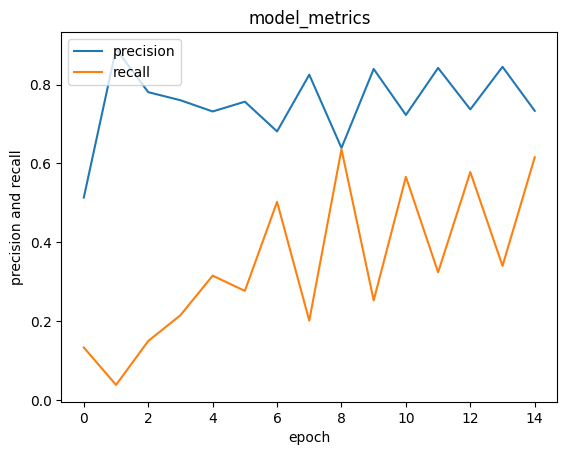

In [66]:
#Plot Precision dan recall dari data train dan test
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('model_metrics')
plt.ylabel('precision and recall')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

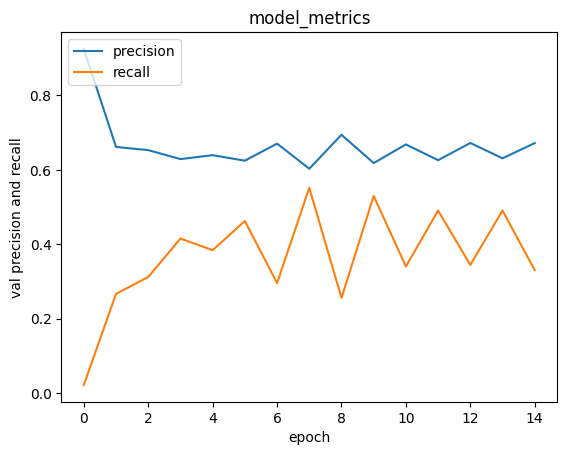

In [67]:
#Plot Val precision dan recall dari data train dan test
plt.plot(history.history['val_precision'])
plt.plot(history.history['val_recall'])
plt.title('model_metrics')
plt.ylabel('val precision and recall')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

In [68]:
#inisiasi variabel baru
book_df = book_new
# Mengambil sample user
user_id = data.UserId.sample(1).iloc[0]
book_visited_by_user = data[data.UserId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_visited = book_df[~book_df['isbn'].isin(book_visited_by_user.ISBN.values)]['isbn']
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)

#
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

In [69]:
#meratakan data rating untuk diprediksi
ratings = model.predict(user_book_array).flatten()

#top rating
top_ratings_indices = ratings.argsort()[-10:][::-1]

#rekomendasi buku
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

#mencari rekomendasi buku berdasarkan rating yang diberikan pengguna
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'rate',
        ascending=False
    )
    .ISBN.values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.publisher)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

#rekomendasi buku
recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]
#fungsi perulangan untuk rekomendasi buku sebanyak 10 buah
for row in recommended_book.itertuples():
    print(row.title, ':', row.publisher)

905/905 [==============================] - 1s 1ms/step
Showing recommendations for users: 10819
Book with high ratings from user
--------------------------------
Pilgrim at Tinker Creek : Perennial
Death Comes As the End : Harper Mass Market Paperbacks (Mm)
Bridge to Terabithia : HarperTrophy
The Best Christmas Pageant Ever : HarperTrophy
Agatha : Ballantine Books
Don't Get Me Started : Ballantine Books
Stardust : Avon
The History of Lesbian Hair: And Other Tales of Bent Life in a Straight World : Main Street Books
Hercule Poirot's Christmas (Hercule Poirot Mysteries (Paperback)) : Berkley Publishing Group
The Spirit Woman : Berkley Publishing Group
The Under Dog and Other Stories : Bantam Books
Five Days in Paris : Dell
Heir Condition: A Schuyler Ridgway Mystery : Signet Book
Gathering Blue : Walter Lorraine Books
The Enchanted April : Pocket
Bachelor Girls : Vintage Books USA
The HOMO HANDBOOK : Simon &amp; Schuster
Maximum Light : Tor Books
The Other Side of Venus : Naiad Pr
-------

## Evaluation

---

Melakukan evaluation terhadap beberapa model algoritma yang digunakan pada tahap modeling

In [70]:
test_loss = model.evaluate(x_val, y_val)
print('\ nTest Loss: {}'.format(test_loss))

1797/1797 [==============================] - 26s 14ms/step - loss: 0.5510 - precision: 0.6643 - recall: 0.3711
\ nTest Loss: [0.5509653687477112, 0.6642705202102661, 0.371086984872818]


In [71]:
predict = model.predict(x_val)
print(predict)

1797/1797 [==============================] - 3s 1ms/step
[[0.23904823]
 [0.09187508]
 [0.19213913]
 ...
 [0.23258512]
 [0.37453407]
 [0.4560142 ]]


In [73]:
#Define precission and recall value
precision = 0.6721
recall = 0.3306

#count f_measuer
f_measure=2*(precision*recall)/(precision+recall)
print("F Measure =",f_measure)

F Measure = 0.4431958910940461
